# Week 14 - Case study on Unsupervised Learning

# 1. Read the dataset to the python environment

Importing necessary libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

Reading dataset Wine.csv in to Python Environment using read_csv().

In [16]:
df=pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


Identifying the basic details of the dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [19]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [20]:
#find shape of dataset
df.shape

(178, 13)

In [21]:
#check the missing values
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

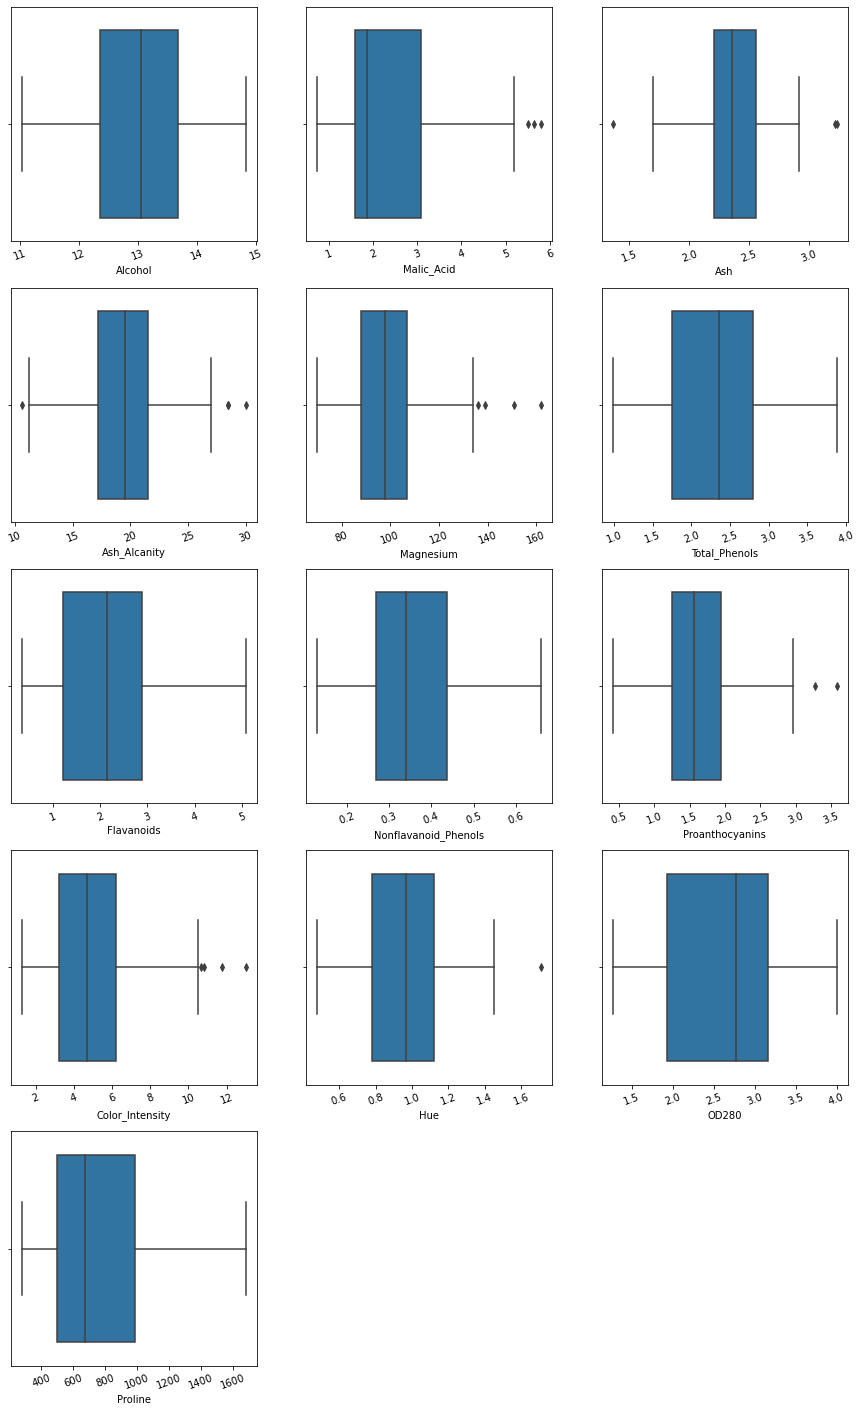

In [23]:
#Checking for Outliers
plt.figure(figsize=(15,25))
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in enumerate(features): 
    ax = plt.subplot(5, 3, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)

In [24]:
#Handling Outliers for the features - Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity, Hue
for i in ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Proanthocyanins', 'Color_Intensity', 'Hue']:
  Q1=np.percentile(df[i],25,interpolation='midpoint')
  Q2=np.percentile(df[i],50,interpolation='midpoint')
  Q3=np.percentile(df[i],75,interpolation='midpoint')
  IQR=Q3-Q1
  low_limit=Q1-1.5*IQR
  up_limit=Q3+1.5*IQR  
  df.loc[df[i]<low_limit, i] = low_limit
  df.loc[df[i]>up_limit, i] = up_limit

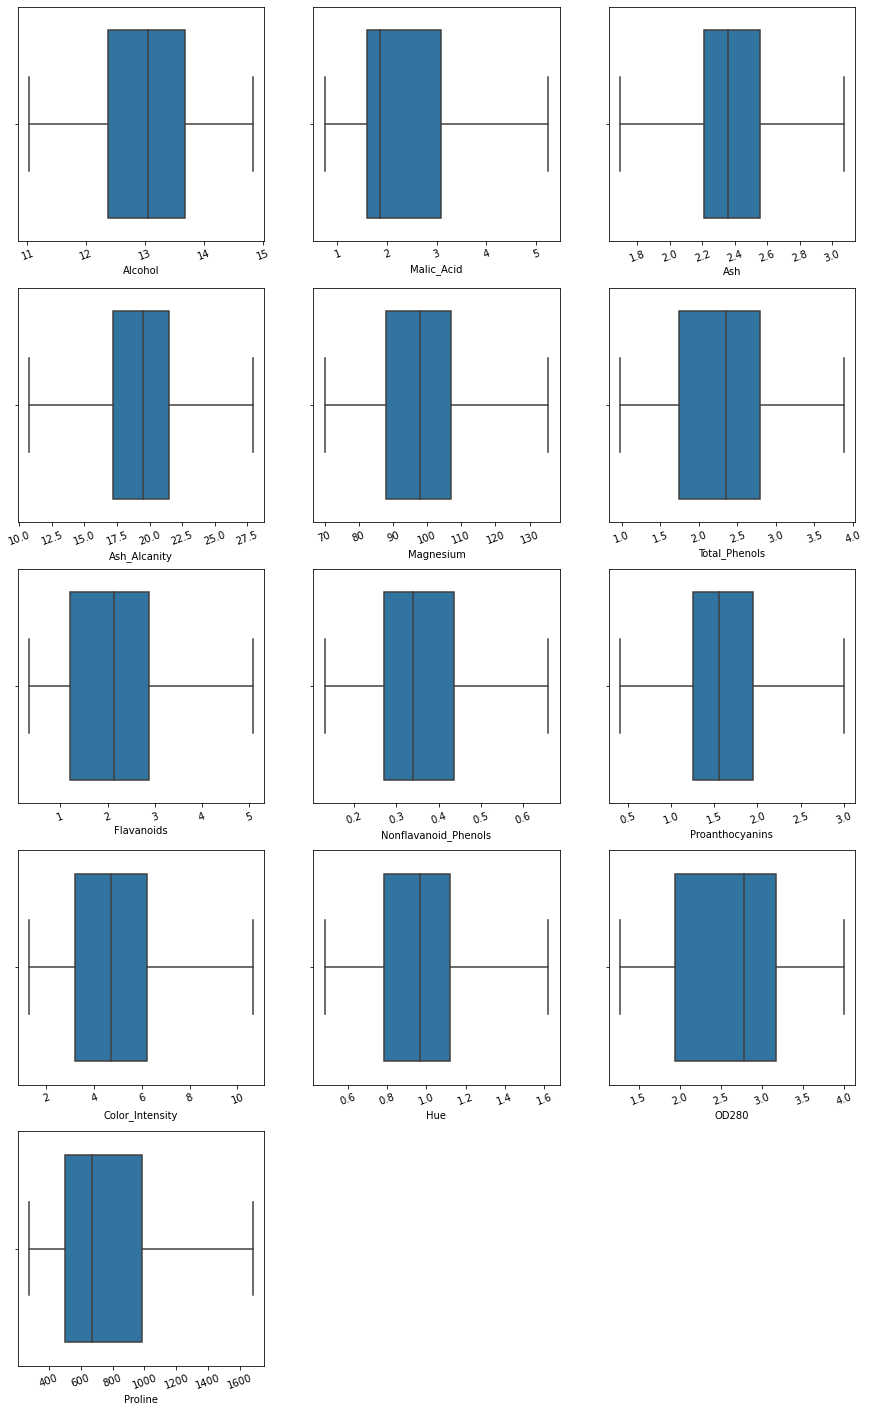

In [25]:
#Checking whether all Outliers are removed or not
plt.figure(figsize=(15,25))
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in enumerate(features): 
    ax = plt.subplot(5, 3, i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xticks(rotation = 20)

In [26]:
#Scaling Data using Standard Scaler
df1 = df.copy(deep=True)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df1 = standard_scaler.fit_transform(df1)

<AxesSubplot:>

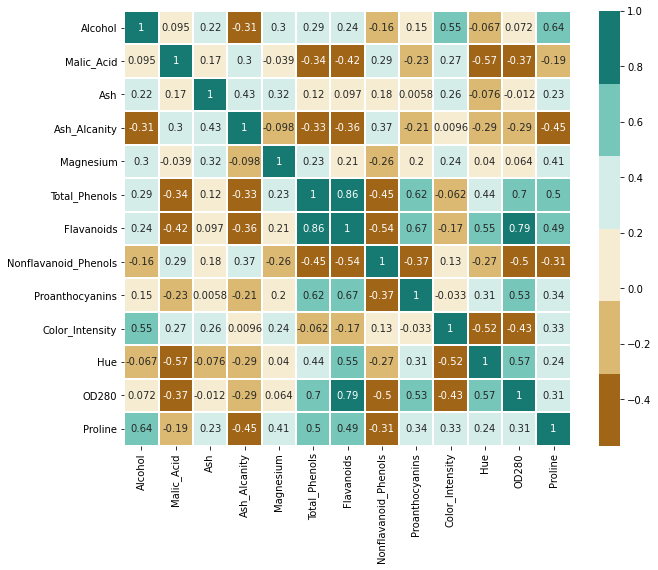

In [27]:
#Finding Correlation using corr() and Plotting a heatmap
corrmatrix=df.corr()
plt.subplots(figsize=(10,8))
colormap = sns.color_palette("BrBG")
sns.heatmap(corrmatrix, annot=True, linewidth=1, cmap=colormap)

# 2. Try out different clustering models in the wine dataset

In [28]:
#K-means Clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

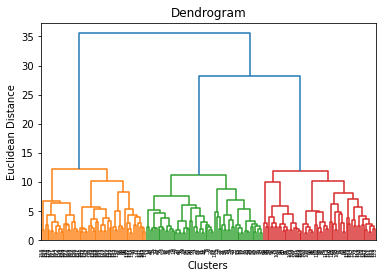

In [29]:
#Agglomerative Hierarchical Clustering
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters

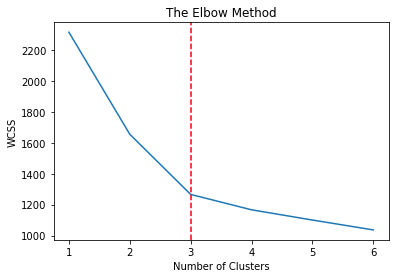

In [30]:
#Optimum number of Clusters using Elbow Method
plt.plot(range(1,7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=3, color='r', linestyle='--')
plt.show()

Creating the model with the optimum number of clusters

In [31]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(df1)

In [32]:
df2 = pd.concat([df, pd.Series(y_kmeans)], axis = 1)
df2.columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'clusters']
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


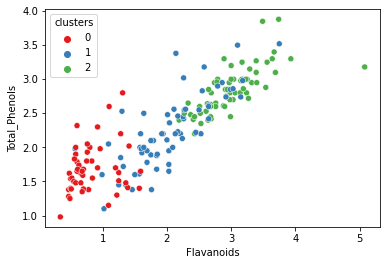

In [33]:
#Scatter Plotting
sns.scatterplot(x = 'Flavanoids', y = 'Total_Phenols', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

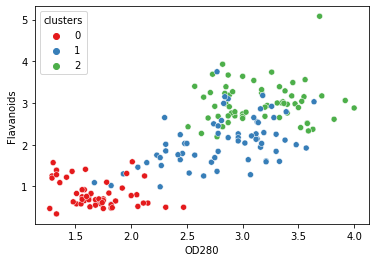

In [34]:
sns.scatterplot(x = 'OD280', y = 'Flavanoids', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

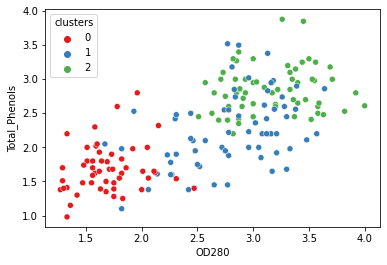

In [35]:
sns.scatterplot(x = 'OD280', y = 'Total_Phenols', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

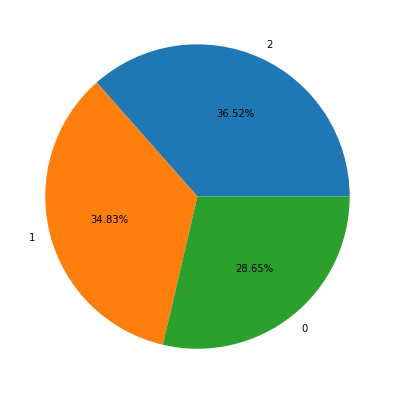

In [36]:
#Pie Chart
fig = plt.figure(figsize =(10, 7))
plt.pie(df2['clusters'].value_counts().to_list(), labels = list(df2['clusters'].unique()),autopct='%1.2f%%')
plt.show()

Insights:
Most of the observations belongs to Cluster no:2

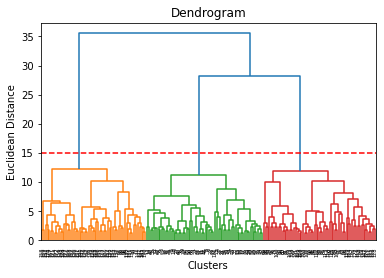

In [38]:
#Optimum number of Clusters using Dendrogram Method
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

Insights:
The number of clusters as per the Dendrogram Method is: 3

In [40]:
#Creating the model with the optimum number of clusters
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(df1)

In [41]:
df2 = pd.concat([df, pd.Series(y_hc)], axis = 1)
df2.columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'clusters']
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


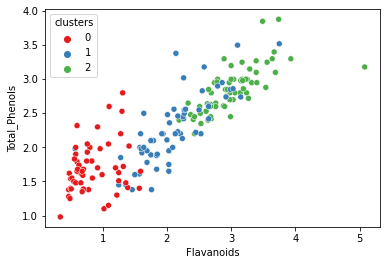

In [42]:
#Scatter Plotting
sns.scatterplot(x = 'Flavanoids', y = 'Total_Phenols', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

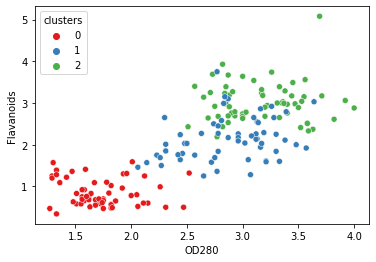

In [43]:
sns.scatterplot(x = 'OD280', y = 'Flavanoids', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

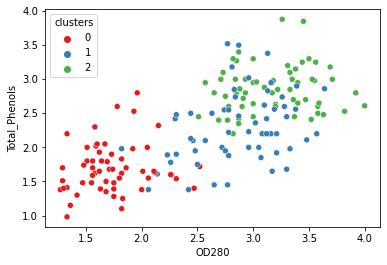

In [44]:
sns.scatterplot(x = 'OD280', y = 'Total_Phenols', hue ='clusters', legend = 'full', data = df2, palette='Set1')
plt.show()

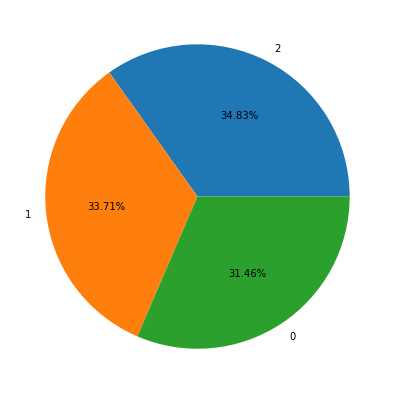

In [45]:
#Pie Chart
fig = plt.figure(figsize =(10, 7))
plt.pie(df2['clusters'].value_counts().to_list(), labels = list(df2['clusters'].unique()),autopct='%1.2f%%')
plt.show()

Insights:
Most of the observations belongs to Cluster no:2